# Check model vertical indices
Look at a few time-averaged height files (or calculated heights) to get the indices corresponding to ~12 and ~20 km

**result: 23-55, inclusive**

In [7]:
import sys
sys.path.append("/home/b/b380887/cold-point-overshoot/python_scripts/")

import xarray as xr
import numpy as np
import jmn_functions as jmn
import matplotlib.pyplot as plt


### SCREAM: calculate height using pressure, temp, Tv

One day at a time and use space/time average

In [3]:
scratch_dir = "/scratch/b/b380887/"

In [2]:
dates = ["1-30", "2-14", "2-28"]

In [4]:
date_dict = {}
pres_dict = {}

for date in dates:
    temp = xr.open_dataset(scratch_dir + "SCREAM/files_for_vert_levs/temp_{}.nc".format(date))["ta"].mean(dim=["ncol", "time"])
    qv = xr.open_dataset(scratch_dir + "SCREAM/files_for_vert_levs/qv_{}.nc".format(date))["hus"].mean(dim=["ncol", "time"])
    pres = temp.lev

    temp_flipped = temp.reindex(lev=temp.lev[::-1])
    qv_flipped = qv.reindex(lev=qv.lev[::-1])
    pres_flipped = temp_flipped.lev

    test_alt = jmn.pres_to_alt(pres_flipped*100., qv_flipped, temp_flipped)

    date_dict[date] = test_alt[::-1]/1000.
    pres_dict[date] = pres


In [5]:
for date in dates:
    print(date, ":")
    for i in range(len(pres)):
        print(i, date_dict[date][i], pres_dict[date][i].values)
    print("\n")
    

1-30 :
0 40.39077916013108 2.58026075363159
1 38.83638318709512 3.23030316829681
2 37.53533760958372 3.88034546375275
3 36.33383282063541 4.59721446037292
4 35.10936425608798 5.47260189056397
5 33.87771964804311 6.531373262405401
6 32.735739398637605 7.70670247077942
7 31.702529627706735 8.96531009674072
8 30.69265589009525 10.4099731445313
9 29.680192763324246 12.109921455383299
10 28.715284898801297 14.006742000579798
11 27.840883450869217 15.999830245971701
12 27.01334419670597 18.1649761199951
13 26.193207996475554 20.6201610565186
14 25.398645813516904 23.338347434997598
15 24.668469423549094 26.174515724182097
16 23.99408298437838 29.1208467483521
17 23.344051819695594 32.2977027893066
18 22.71740296412617 35.7152843475342
19 22.13190274031705 39.2634296417236
20 21.591478104683336 42.8785152435303
21 21.079551738572665 46.6384372711182
22 20.59008816680691 50.574550628662095
23 20.12830294755322 54.630115509033196
24 19.70077766339868 58.7159004211426
25 19.30656808370502 62.797

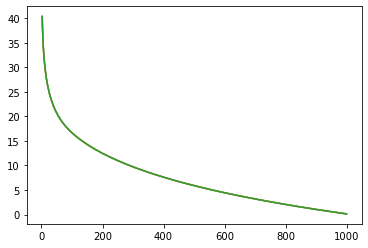

In [8]:
for date in dates:
    plt.plot(pres_dict[date], date_dict[date], label=date)
    
plt.show()


### Save an average file

#### Get the mean height at all levels

In [10]:
mean_z = (date_dict[dates[0]] + date_dict[dates[1]] + date_dict[dates[2]])/3.


In [11]:
mean_z

array([40.34852311, 38.80759857, 37.51721805, 36.32570032, 35.11090618,
       33.88871015, 32.75538556, 31.72838794, 30.72179344, 29.7102523 ,
       28.74520317, 27.87039051, 27.04223569, 26.22117829, 25.42555784,
       24.69449704, 24.01945921, 23.36882724, 22.74146068, 22.15504836,
       21.61358059, 21.10054443, 20.60998216, 20.14710946, 19.71845049,
       19.32300427, 18.95668494, 18.61558486, 18.29705097, 18.00665691,
       17.7480384 , 17.5162987 , 17.3005918 , 17.08750819, 16.87101466,
       16.65056027, 16.43112286, 16.21449466, 15.9954027 , 15.77163624,
       15.54687084, 15.32489725, 15.1017178 , 14.87330005, 14.64191362,
       14.41346037, 14.18526043, 13.95127832, 13.71223623, 13.47455101,
       13.23881798, 12.99848909, 12.75247535, 12.50595067, 12.26170574,
       12.01435493, 11.76082775, 11.50481653, 11.25138946, 10.99653742,
       10.73502768, 10.46893572, 10.20530992,  9.94221568,  9.67256914,
        9.39664047,  9.12150415,  8.84876894,  8.57135034,  8.28

In [16]:
da_z = xr.DataArray(mean_z*1000., dims="lev", coords={"lev": pres_dict[dates[0]].lev},
                    attrs={"units": "m"})


#### Subset the 12-20 km range (using the 23-55 indices, inclusive) and save that file to a netcdf

In [19]:
da_z_12_20 = da_z.isel(lev=slice(23, 56))
da_z_12_20

<xarray.DataArray (lev: 33)>
array([20147.10945551, 19718.45049368, 19323.0042725 , 18956.68493842,
       18615.5848551 , 18297.05096504, 18006.65691003, 17748.03840297,
       17516.29870199, 17300.59180158, 17087.50818648, 16871.01466209,
       16650.56026859, 16431.12286011, 16214.49466024, 15995.4027018 ,
       15771.63623619, 15546.87084392, 15324.89724975, 15101.71780308,
       14873.30004901, 14641.91361527, 14413.46036748, 14185.26043365,
       13951.27832273, 13712.23623036, 13474.55100906, 13238.81797734,
       12998.48908958, 12752.47534891, 12505.95066784, 12261.70574399,
       12014.35493247])
Coordinates:
  * lev      (lev) float64 54.63 58.72 62.8 66.87 ... 191.3 198.7 206.4 214.3
Attributes:
    units:    m

In [20]:
ds_z_12_20 = xr.Dataset({"z": da_z_12_20})


In [23]:
ds_z_12_20.to_netcdf(scratch_dir + "SCREAM/SCREAM_est_height_12-20km.nc")
